In [1]:
# pip install xgboost

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

In [4]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb = xgb.fit(x_train, y_train)
# xgb_pred = xgb.predict(x_test)

# print("Accuracy: ", accuracy_score(y_test, xgb_pred))
# print("Micro F1 Score: ", f1_score_rep(y_test, xgb_pred, average="micro"))
# print("Macro F1 Score: ", f1_score_rep(y_test, xgb_pred, average="macro"))

FPR: [0.00000000e+00 1.72816037e-05 9.33914654e-02 6.15084397e-02
 4.84229147e-03 4.38891393e-03 0.00000000e+00 4.82863209e-03
 1.56709221e-03 2.34003573e-04]
TPR: [0.         0.06701031 0.62157534 0.66205492 0.84843819 0.984825
 1.         0.74930893 0.26919682 0.59230769]
FNR: [1.         0.93298969 0.37842466 0.33794508 0.15156181 0.015175
 0.         0.25069107 0.73080318 0.40769231]
TNR: [1.         0.99998272 0.90660853 0.93849156 0.99515771 0.99561109
 1.         0.99517137 0.99843291 0.999766  ]
Precision: 0.7051864440250284
Accuracy: 0.8492708493735065
F1-score: 0.8517793293676723
AUC: 0.9621835696022467
FPR: 0.017077811996467285
tpr: 0.5794717207219426
fnr: 0.4205282792780573
tnr: 0.9829221880035327


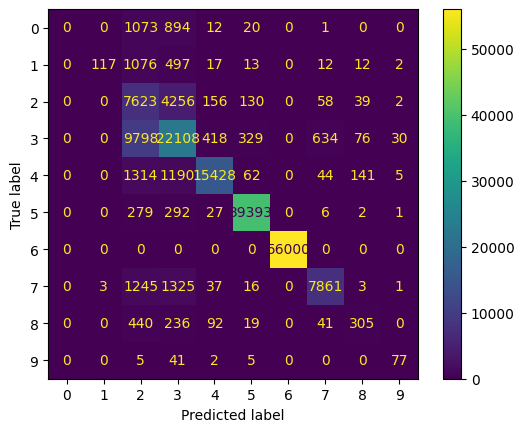

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, xgb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=xgb.classes_)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "xgb",
    "Accuracy": accuracy,
    "Precision": precision,
    "F1-score": f1,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/UNSW/model.csv", mode='a',header = False, index=False)

In [6]:
print("done")

done


In [7]:
# import xgboost as xgb
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path


# # 定义参数
# xgb_params = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],  # 学习率
#     'n_estimators': [50, 100, 200],  # 树的数量
#     'max_depth': [3, 6, 9, 12],  # 树的最大深度
#     'min_child_weight': [1, 2, 3],  # 决定最小叶子节点样本权重和
#     'gamma': [0, 0.1, 0.2],  # 用于控制是否后剪枝的参数
#     'subsample': [0.7, 0.8, 0.9],  # 子样本占整个样本集合的比例
#     'colsample_bytree': [0.7, 0.8, 0.9]  # 在建立树时对特征采样的比例
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Cybersecurity/Datasets/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_xgb(x_train, y_train, param_grid):
#     xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#     start = time()
#     halving_xgb_results = HalvingGridSearchCV(
#         xgbc,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_xgb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_xgb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_xgb(x_val, y_val, xgb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 XGBoost 模型
# best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
# best_xgb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_xgb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_xgb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_xgb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)
